# 2.4 Exercises

## Conceptual Questions

### **Question 1**

For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse that an inflexible method. Justify your answer.

#### (a) The sample size $n$ is extremely large, and the number of predictors $p$ is small.

**Answer**:  With an extremely large sample size and a small number of predictors, a flexible model will perform better than an inflexible model. This is due to the fact that assuming a supervised learning model following the standard bias-variance tradeoff model for an approximation model $\hat{f}$ predicting $y_0$:

$$ 
\begin{align}
    \mathbb{E}(y_0 - \hat{f}(x_0))^2 &= \text{Var}(\hat{f}(x_0)) + [\text{Bias}(\hat{f}(x_0))]^2 + \text{Var}(\epsilon),
\end{align}    
$$

model performance is based upon minimizing the variance and bias terms of $\hat{f}$. With an extremely large sample size, the variance of $\hat{f}$ will be minimized no matter what model flexibility we assume. Flexible models often suffer due to high variance, but due to the extremely large sample size this will be mitigated. However, given a small number of predictors $p$, the bias term will be minimized when we use a flexible model as opposed to an inflexible model. This is because a flexible model that does not assume a linear relationship among the predictors introduces less assumptions of the relationship between the predictors, thereby lowering the bias of $\hat{f}$.

#### (b) The number of predictors $p$ is extremely large, and the number of observations $n$ is small.

**Answer:** With an extremely large number of predictors and small number of observations, then an inflexible model will perform better. Referencing equation $(1)$ above, model performance is dependent upon the variance and bias of $\hat{f}$. With a small number of observations, flexible models will suffer from high variance dependent upon the training set. While their bias will be small, this will be offset by the very high variance. In comparison, using an inflexible model (such as assuming a linear relationship among the predictors) will result in less variance dependent upon the training set due to the rigid loss functions of the inflexible model. Their higher bias will be offset by the greatly reduced variance, resulting in an overall improved model performance. This will avoid the common pitfall of overfitting, which is commen when using very flexible models with small sample sizes.

#### (c) The relationship between the predictors and response is highly non-linear.

**Answer:** In the case that the relationship between the predictors and response is highly non-linear, the model with the best performance would be a flexible model. As inflexible models often assume a rigid linear relationship between the predictors (such as linear regression), an inflexible model would not capture the true relationship between the predictors. While an inflexible model $\hat{f}$ following equation $(1)$ would have a low bias term, due to the relationship between the predictors not able to be captured by an inflexible model the variance of $\hat{f}$ (depending upon the training data) would be very high, resulting in poor performance (i.e., underfitting). Using a flexible model would introduce low bias and be better at capturing the relationship among the predictors using the training data, resulting in a lower variance term as well. Note though, that if the sample size was small, a simpler flexible model would be preferable to avoid overfitting.

#### (d) The variance of the error terms, i.e., $\sigma^2 = \text{Var}(\epsilon)$, is extremely high.

**Answer:** In the case that the variance of the error terms is extremely high, then an inflexible model will have the best performance. The reason is that a flexible model will be extremely sensitive to the erradic noise present in the sample data. Following equation $(1)$, a flexible model is very sensitive to the sample data and the variance of $\hat{f}$ will greatly increase due to the randomness of the noise present from the distribution of $\epsilon$. To mitigate overfitting the noise of the model, an inflexible model's rigid structure (such as linear regression) will ignore extreme variation caused by the distribution of $\epsilon$, resulting in overall better model performance. 

### Question 2

Explain whether each scenario is a classification or regression problem, and indicate whether we are more interested in inference or prediction. Finally, provide $n$ and $p$.

#### (a) We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**Answer:** The above scenario is a regression problem, as we are trying to understand CEO salary, which is a continuous numerical variable and not a categorical variable. In particular, we are more interested in inference rather than prediction, as we wish to understand which factors affect CEO salary as opposed to merely predicting CEO salary based on the prescribed features. In this case, an inflexible model with a rigid structure would be recommended to measure the impact of each feature on model structure and/or performance. Finally, $n = 500$ and $p = 4$.

#### (b) We are considering launching a new product and wish to know whether it will be a *success* or a *failure*. We collect data on 20 similar products that were previously launched. For each product we have recorded whether or not is was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**Answer:** The above scenario is a classification problem, as we are trying to classify products into one of two categories, either *success* or *failure* (i.e., a categorical variable with two possible states). In particular, we are more interested in prediction rather than inference, as the goal is simply to identify which products will be succesful rather than what variables impact product success. In this case, $n=20$ and $p=14$. With such a small sample size and nearly equivalent number of predictors, a simple flexible model is recommended to capture the possible non-linear relationship among the features but also avoid overfitting.

#### (c) We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.

**Answer:** The above scenario is a regression problem, as we are trying to predict the % change which is a continuous numerical variable (bounded by 0% and 100%). In particular, we are more interested in prediction rather than inference, as the goal is to predict the % change rather than understand how the tracked features impact % change. Finally, $n=52$ (52 weeks in a year and data is collected every week) and $p = 4$ (% change in each market). We recommend a flexible model due to the high likelihood that the relationship among the predictors and response is highly non-linear. This, however, means that care must be taken not to overfit due to the small sample size. As such, a simple flexible model is recommended.

### Question 3

We now revisit the bias-variance decomposition.

#### (a) Provide a sketch of typical (squared) bias, variance, training error, test error, and Bayes (or irreducible) error curve, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The $x$-axis should represent the amount of flexibility in the method, and the $y$-axis should represent the values for each curve. There should be five curves. Make sure to label each one.

To answer this question, we will form a plot using the `matplotlib.pyplot` library.

In [22]:
# Import the needed packages
import matplotlib.pyplot as plt             # For plotting
import numpy as np                          # For arrays
import pandas as pd
from scipy.interpolate import interp1d   # For smooth lines

Next we'll form the graph.

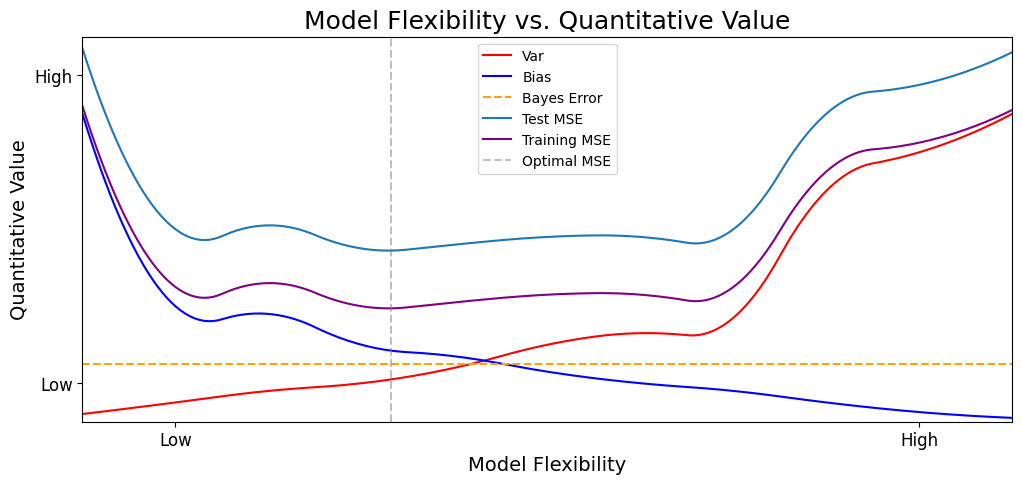

In [47]:
# Set the x and y-axis parameters
x_lim = y_lim = [0, 10]
x_ticks = y_ticks = [1, 9]
x_tick_label = y_tick_label = ['Low', 'High']
tick_font_size = 12

# Set figure labels
x_label = 'Model Flexibility'
y_label = 'Quantitative Value'
label_font_size = 14
title = 'Model Flexibility vs. Quantitative Value'
title_font_size = 18

# Initialize the figure
fig, ax = plt.subplots(figsize=(12,5))

# Set the x-axis
ax.set_xlim(x_lim)
ax.set_xticks(x_ticks, labels=x_tick_label, fontsize=tick_font_size)
ax.set_xlabel(x_label, fontsize = label_font_size)

# Set the y-axis
ax.set_ylim(y_lim)
ax.set_yticks(y_ticks, labels=y_tick_label, fontsize=tick_font_size)
ax.set_ylabel(y_label, fontsize=label_font_size)

# Set the figure label
ax.set_title(title, fontsize=title_font_size)

# Set the range of x-values
x = np.array(range(x_lim[0], x_lim[1]+1, 1))

# Plot the variance
y_var = [0.2, 0.5, 0.8, 1, 1.4, 2, 2.3, 2.7, 6, 7, 8]
cs = interp1d(x, y_var, kind='quadratic')
x_var_smooth = np.linspace(x.min(), x.max(), 200) # Add more x-values for smoother look
y_var_smooth = cs(x_var_smooth)
ax.plot(
    x_var_smooth,
    y_var_smooth,
    '-',
    # label=r'$\text{Var}(\hat{f}(x_0))$',
    label='Var',
    color='r'
)

# Plot the (squared) bias
y_bias = [8, 3, 2.8, 2, 1.7, 1.3, 1, 0.8, 0.5, 0.25, 0.1]
cs = interp1d(x, y_bias, kind='quadratic')
x_bias_smooth = np.linspace(x.min(), x.max(), 200) # Add more x-values for smoother look
y_bias_smooth = cs(x_bias_smooth)
ax.plot(
    x_bias_smooth,
    y_bias_smooth,
    '-',
    # label=r'$[\text{Bias}(\hat{f}(x_0))]^2$',
    label='Bias',
    color='b'
)

# Plot the (Bayes) irreducible error
ax.plot(
    range(0,11,1),
    [1.5]*11, 
    '--', 
    # label=r'$\text{Var}(\epsilon)$',
    label='Bayes Error',
    color='orange'
)

# Plot the test error
y_test_error = y_bias_smooth + y_var_smooth + np.array([1.5]*200)
ax.plot(
    x_bias_smooth,
    y_test_error,
    '-',
    # label=r'$\mathbb{E}(y_0 - \hat{f}(x_0))^2$'
    label='Test MSE'
)

# Plot the training error
ax.plot(
    x_bias_smooth,
    y_bias_smooth + y_var_smooth,
    '-',
    label='Training MSE',
    color='purple'
)

# Plot the optimal MSE
plt.axvline(
    x=x_bias_smooth[np.where(y_test_error == y_test_error.min())],
    linestyle='--',
    color='gray',
    alpha=0.5,
    label='Optimal MSE'
)

ax.legend() # Turn on the legend

plt.show()

#### (b) Explain why each of the five curves has the shape displayed in part (a).

For each of the five curves, we have the above shape as:
- **Variance** : The variance of the MSE (assuming a supervised learning model) is very low for inflexible models due to the rigid structure of their loss functions. However, as model flexibility increases changes to the training set can result in different models $\hat{f}$, thereby resulting in higher variance.
- **Bias** : The bias of the MSE is very high for inflexible models as they assume a strong rigid structure between the predictor variables. As model flexibility increases, this assumption loosens, which lowers the bias of the model $\hat{f}$.
- **Bayes (Irreducible) Error** : The irreducible error is a random variable that is caused by uncontrollable factors, and is assumed to have fixed (albeit, low) variance throughout. 
- **Test MSE** : The test MSE (or test error) is the sum of the three components: the variance, bias, and irreducible error. These three combine to give the average MSE per model $\hat{f}$.
- **Training MSE** : The training MSE (or training error) is the same as above, only limited to the calculations done on the training data (while the test MSE is limited to calculation done on the test data). Since we would expect the model to perform better on the training data (i.e., *known* data) rather than the test data (i.e., *unknown* data), then the training MSE is less (on average) than the test MSE.
- **Optimal MSE** : The optimal MSE is the minimum value of the test MSE, and indicates the recommended model $\hat{f}$ to use in production.